<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Ejercicio_Tinas_EFCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1:
La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución de probabilidad:


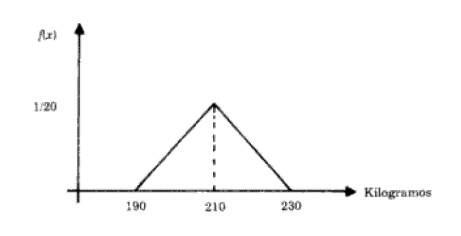

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?

*   Resolver analíticamente.
*   Resolver por simulación.




# Analiticamente:


Definimos la distribucion de densidad:

$f(x)=\left\{\begin{matrix}
\frac{x-190}{400}, & 190\leq x\leq 210 \\
 -\frac{x-230}{400}, & 210\leq x\leq 230
\end{matrix}\right.$

Calculamos media:

$E[X]=\int_{-\infty }^{\infty }xf(x)dx=\frac{1}{400}\int_{190}^{210}x(x-190)dx -\frac{1}{400}\int_{210}^{230}x(x-230)dx=...$

$...\frac{1}{400}[\frac{x^{3}-285x^{2}}{3}\left.\begin{matrix}210\\ 190\end{matrix}\right|-\frac{x^{3}-345x^{2}}{3}\left.\begin{matrix}230\\ 210\end{matrix}\right|]= 210$


Calculamos varianza:

$Var[X]=\int_{-\infty }^{\infty }(x-\mu)^{2}f(x)dx=\frac{1}{400}\int_{190}^{210}(x-210)^{2}(x-190)dx-\frac{1}{400}\int_{210}^{230}(x-210)^{2}(x-230)dx=...$

$...\frac{1}{400}[\frac{(x-210)^{4}}{4}+\frac{20(x-210)^{3}}{3}]\left.\begin{matrix}
210\\ 190\end{matrix}\right|-\frac{1}{400}[\frac{(x-210)^{4}}{4}-\frac{20(x-210)^{3}}{3}]\left.\begin{matrix}
230\\ 210\end{matrix}\right|]=\frac{200}{3}$

Asi:

$E[X]=210$

$Var[X]=\frac{200}{3}$

Se tiene:
$P(x_{1}+x_{2}+x_{3}+x_{4}+x_{5}\leq 1000)$ , diviendo entre $5$ y aplicando teorema central del limite:

$P(\bar{x}\leq 200)$

$P(Z\leq\frac{200-210}{\frac{\sigma}{\sqrt{n}}})=P(Z\leq-2.74)=0.0032$

Asi:

$P(x_{1}+x_{2}+x_{3}+x_{4}+x_{5}\geq 1000)=1-0.0032=0.9968$

# Por simulacion:

In [131]:
import numpy as np
import matplotlib.pyplot as plt

Genera la $F(x)$:

$F(x)=\int_{-\infty }^{\infty}f(s)ds=\int_{190 }^{x}\frac{(s-190)}{400}ds=\frac{(x-190)^{2}}{800}$

$F(x)=\int_{-\infty }^{\infty}f(s)ds=\int_{190 }^{x}f(s)ds=\int_{190 }^{210}\frac{(s-190)}{400}ds-\int_{210 }^{x}\frac{(s-230)}{400}ds=1-\frac{(x-230)^{2}}{800}$

$F(x)=\left\{\begin{matrix}
\frac{(x-190)^{2}}{800}, & 190\leq x\leq 210 \\
 1-\frac{(x-230)^{2}}{800}, & 210\leq x\leq 230
\end{matrix}\right.$

La inversa:

$F^{-1}(x)=\left\{\begin{matrix}
190+\sqrt{800R}, & 0\leq x\leq \frac{1}{2} \\
 230-\sqrt{800(1-R)}, & \frac{1}{2}\leq x\leq 1
\end{matrix}\right.$

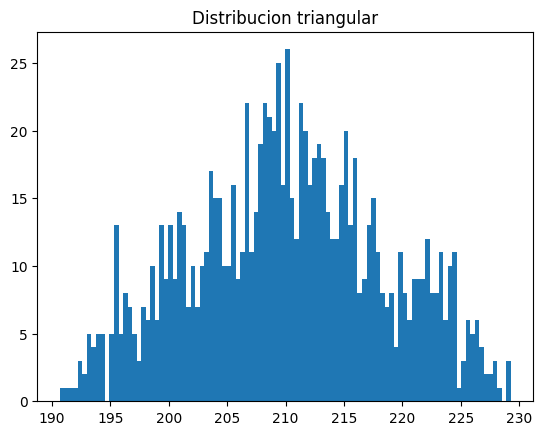

In [132]:
#Graficamos
X=[]
for i in range(1000):
  r=np.random.rand()
  if r<=0.5:
    x=190+(800*r)**(1/2)

  else :
    x=230-(800*(1-r))**(1/2)

  X.append(x)


plt.hist(X,bins=100)
plt.title("Distribucion triangular")
plt.show()

In [133]:
def quintos():
  X=np.zeros((5,1))
  j=0

  for i in range(5):
    r=np.random.rand()
    if r<0.5:
      x=190+(800*r)**(1/2)

    else :
      x=230-(800*(1-r))**(1/2)


    X[i]=x
  Su=np.sum(X[:, 0])
  if Su>1000:
    j=1

  return j


La probabilidad es:  0.9975777777777778


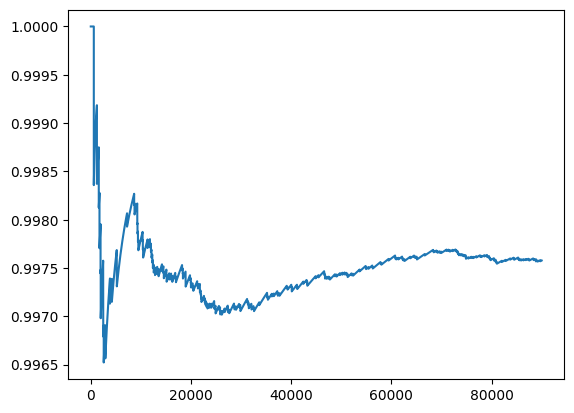

In [134]:
#Calculo por simulacion:
s=0
N=90000
l=[]
for i in range(N):
  j=quintos()
  s=j+s
  l.append(s/(i+1))

print("La probabilidad es: ", s/N)
plt.plot(l)
plt.show()

# Ejercicio 2:
Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de 200. Tambien suponga que el costo promedio anual de un camion 60, 000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?


*   Resolver analíticamente.
*   Resolver por simulación.

Analiticamente:

Se trabajaran un total de 260 dias, al dia hay una probabilidad del 0.996 de que exista un excedente y cada excedente le cuesta a la empresa 200, por lo tanto:

$(260)(0.996)($200)= $51,792< 60,000 \therefore  $ la primera opcion es mas viable.

Por simulacion:

In [135]:
def costo():
  X=np.zeros((5,1))
  c=0

  for i in range(5):
    r=np.random.rand()
    if r<0.5:
      x=190+(800*r)**(1/2)

    else :
      x=230-(800*(1-r))**(1/2)


    X[i]=x
  Su=np.sum(X[:, 0])
  if Su>1000:
    c=200
  else:
    c=0
  return c

In [136]:
N=500
n=260
k=0
lista=[]
l1=[]
for j in range(N):
  s=0
  c=0
  for i in range(n):
    c=costo()
    s=c+s

  k=s+k
  lista.append(s)
  l1.append(k/(j+1))

promedio=sum(lista)/(N)

if promedio<60000:
  print("Es viable pagar el excedente con un costo promedio anual de: $", promedio)
else:
  print("No es viable pagar el excedente con un costo promedio anual de: $", promedio)


Es viable pagar el excedente con un costo promedio anual de: $ 51872.0


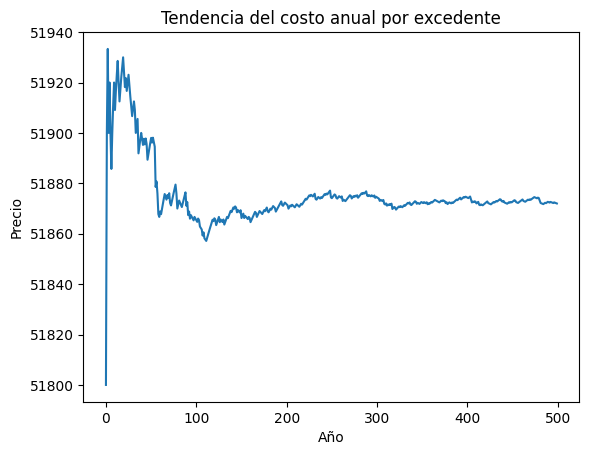

In [137]:
plt.plot(l1)
plt.title("Tendencia del costo anual por excedente")
plt.ylabel('Precio')
plt.xlabel("Año")
plt.show()